In [1]:
import matplotlib.pyplot as plt
from natsort import natsorted
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys

sns.set_style('white')
plt.rcParams['savefig.facecolor'] = 'w'


In [2]:
sys.path.append(os.path.abspath('../library/'))
from fbrundu_sclib import *
from scran_normalize_JZ import *


In [3]:
import scanpy as sc
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=300, dpi_save=300)


# Read

In [27]:
adata = sc.read_text('/Users/junfeizhao/Downloads/GSE131928_RAW/GSM3828672_Smartseq2_GBM_IDHwt_processed_TPM.T.tsv',delimiter='\t',first_column_names=True)


In [28]:
adata

AnnData object with n_obs × n_vars = 7930 × 23686

In [10]:
#adata.obs['patient'] = [s.split('_')[0] for s in list(adata.obs.index.values)]

In [ ]:
#adata.write('GSM3828672.raw.h5ad')

In [29]:
sc.pp.log1p(adata)


In [38]:
#adata.write('GSM3828672.log1p.h5ad')


# Add cell type

In [8]:
SS2 = pd.read_csv('/Volumes/zjf/CHEK2/GSE131928_RAW/IDHwtGBM.tSNE.SS2.txt',sep='\t',skiprows = [1],index_col=0)

In [31]:
adata.obs['LABELS'] = SS2['LABELS']

# Add tumor name

In [82]:
ID_mapping = pd.read_csv('/Volumes/zjf/CHEK2/Cell_IDs.csv',index_col=0)

In [83]:
adata.obs['Patient'] = ID_mapping['tumour name']

In [84]:
adata

AnnData object with n_obs × n_vars = 7930 × 23686
    obs: 'LABELS', 'Patient'
    uns: 'log1p', 'neighbors', 'umap', 'LABELS_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

# Clustering

In [5]:
adata = sc.read('/Volumes/zjf/CHEK2/GSM3828672.final.h5ad')
adata

AnnData object with n_obs × n_vars = 7930 × 23686
    obs: 'LABELS', 'Patient'
    uns: 'LABELS_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [8]:
index = [list(adata.var_names).index('CHEK2'),list(adata.var_names).index('CHEK1'),list(adata.var_names).index('ATM'),list(adata.var_names).index('TMEM173')]
adata.to_df().iloc[:,index].to_csv('CHEK2_expression.csv')

In [ ]:
#adata = sc.read('GSM3828673.log1p.h5ad')
#adata.raw = adata
sc.pp.neighbors(
    adata,
    random_state=42,
)

sc.tl.umap(adata, random_state=42)
sc.pl.umap(adata, color=['LABELS'], save='.GSM3828672.label.pdf')


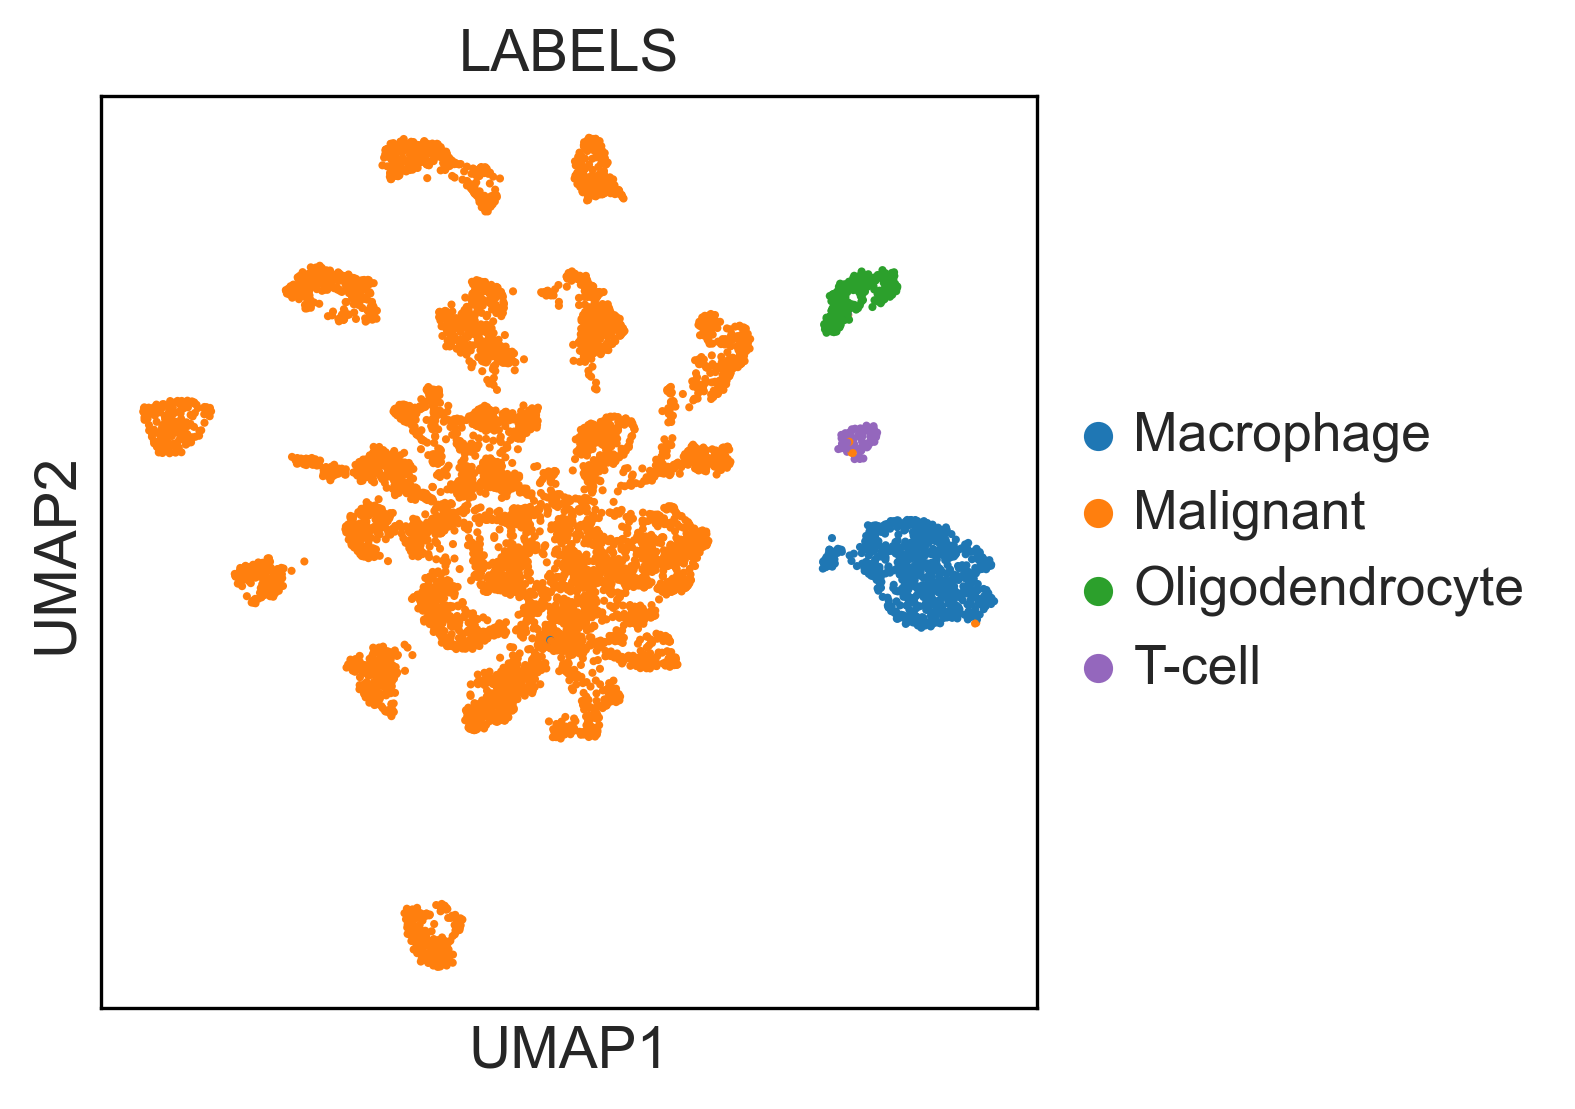

In [6]:
sc.pl.umap(adata, color=['LABELS'], palette=['#1f77b4','#ff7f0e','#2ca02c','#9467bd'], save='.GSM3828672.label.pdf')


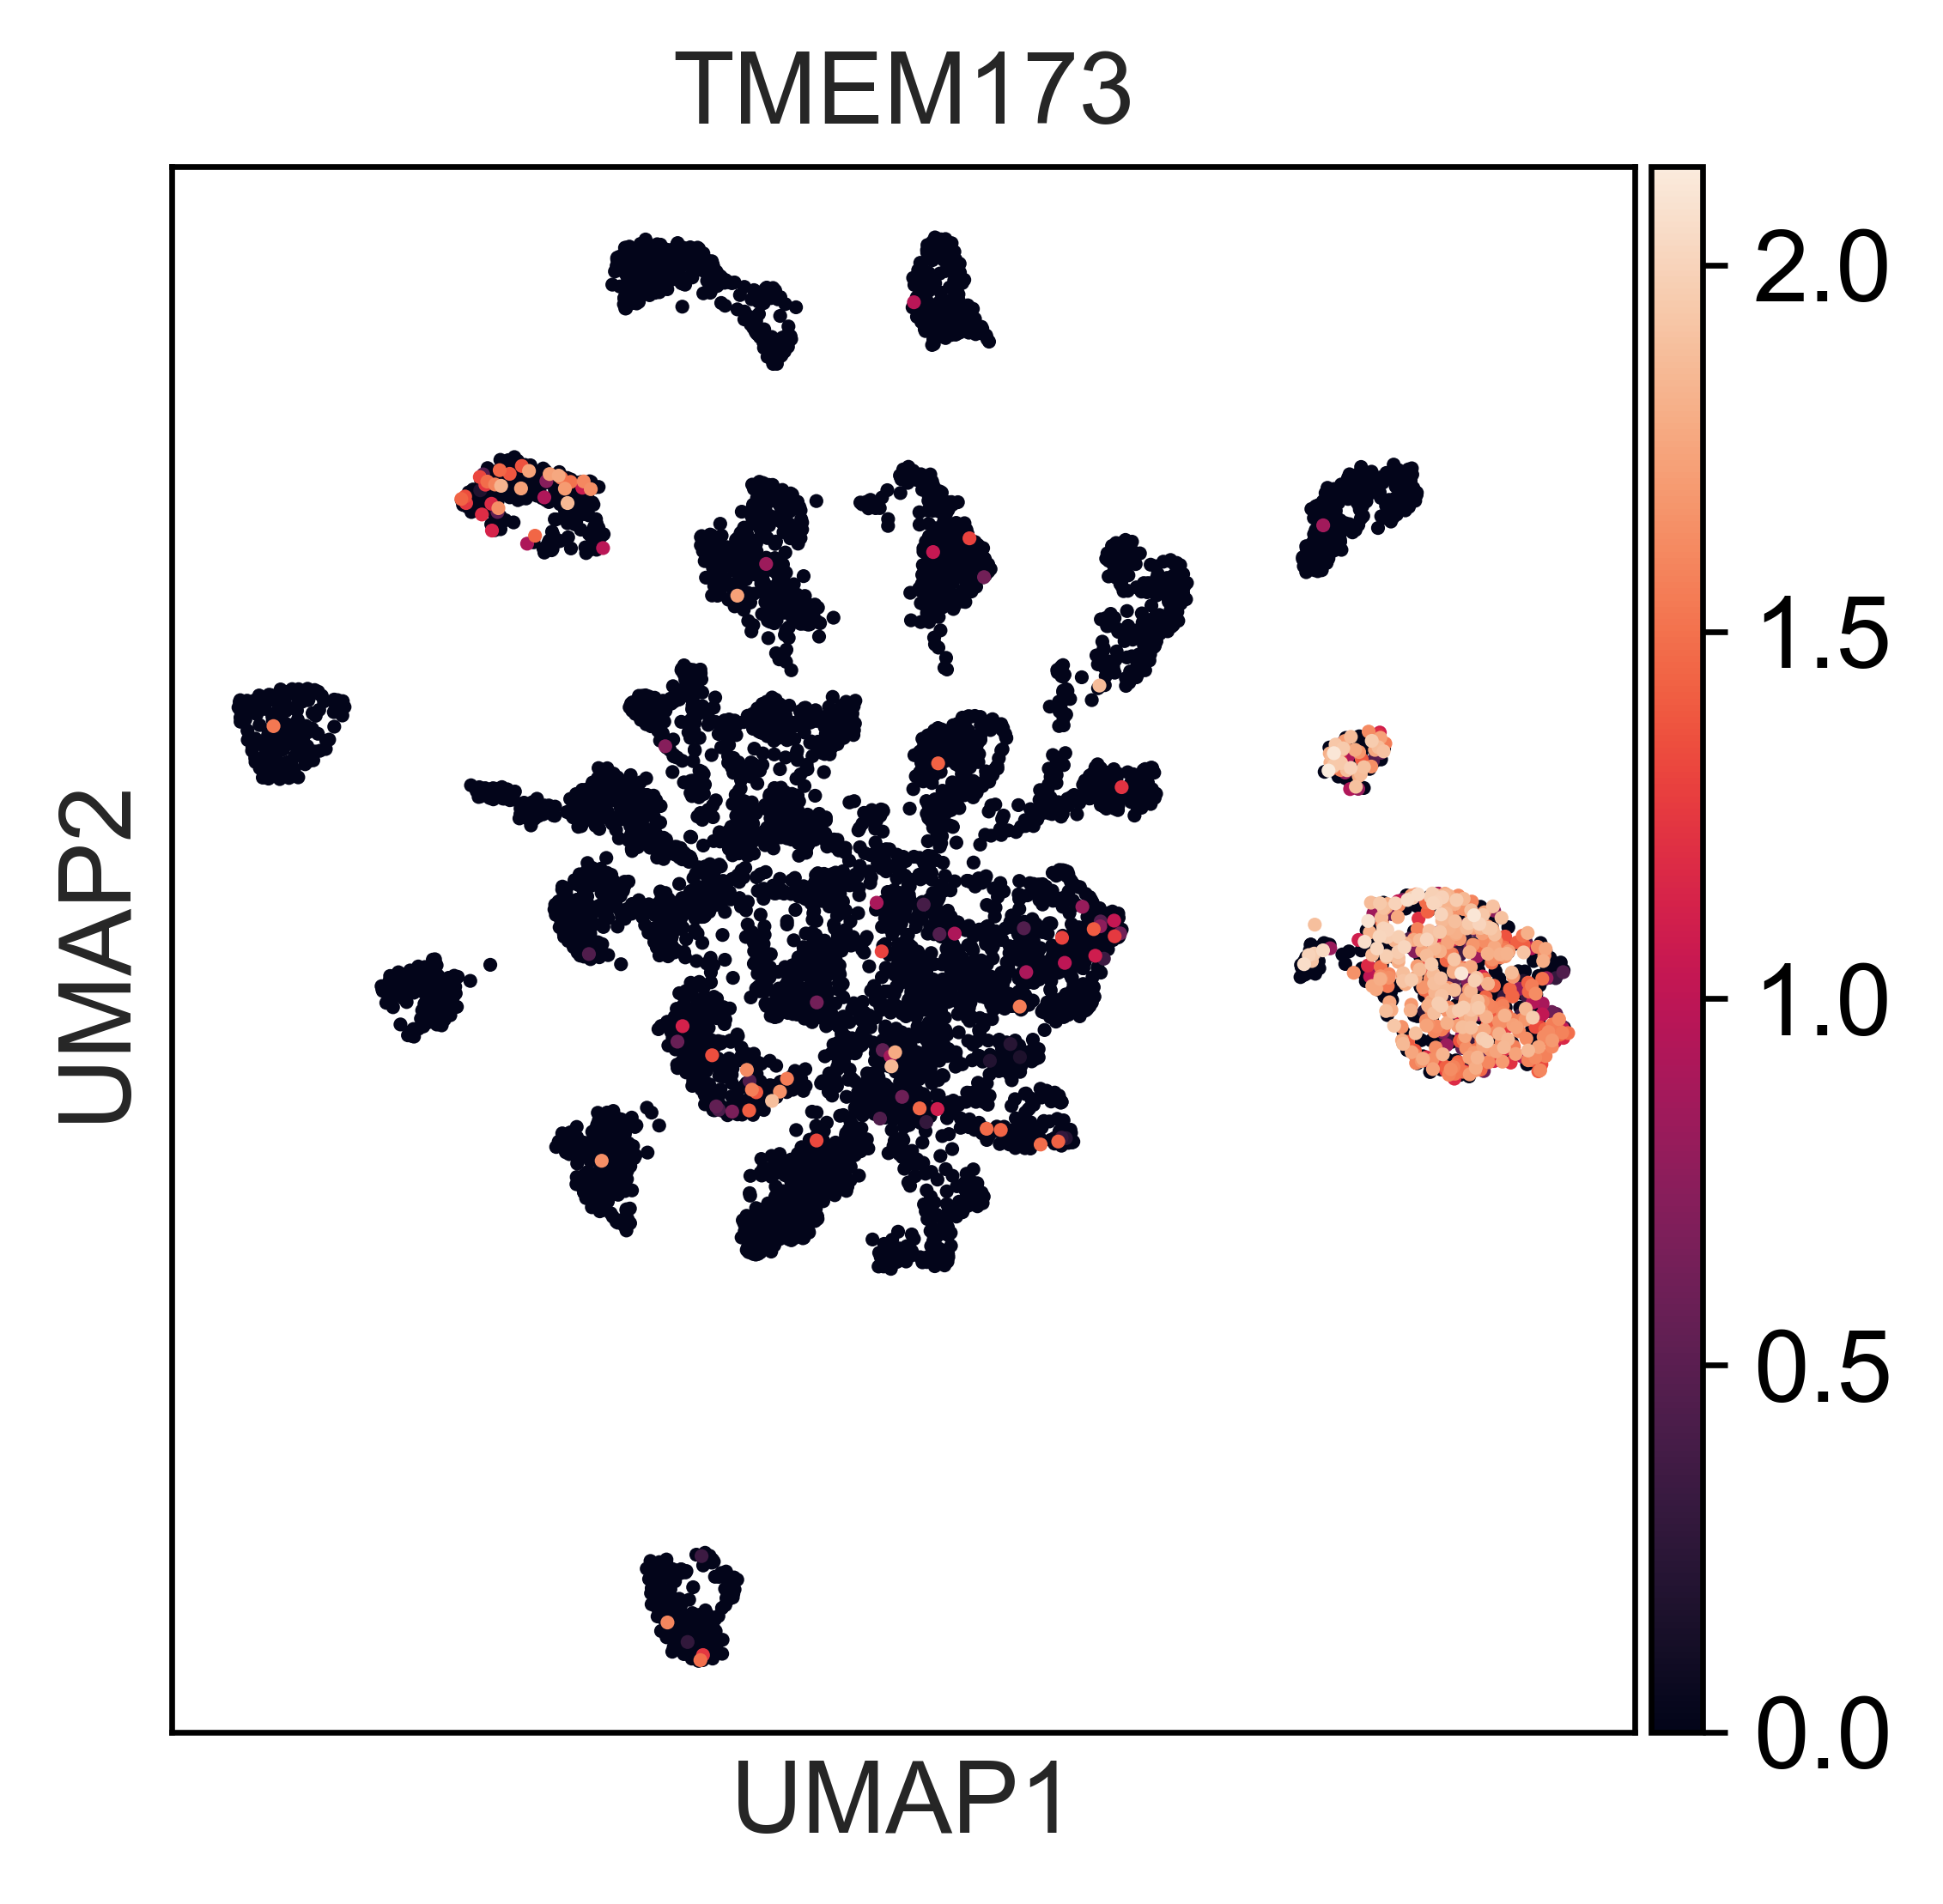

In [7]:
sc.pl.umap(
    adata,
    color=['TMEM173'],
    legend_loc='on data',
    save='.GSM3828672.TMEM173.pdf'
)

In [4]:
AUC = pd.read_csv('/Volumes/zjf/CHEK2/GSM3828672.cells_AUC.Geneset.csv',index_col=0).T
list(AUC.columns)

['Type_1_interferon_response',
 'Response_to_viral_infection',
 'GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION',
 'GOBP_POSITIVE_REGULATION_OF_T_CELL_MEDIATED_CYTOTOXICITY',
 'Interferon_type_I',
 'REACTOME_INTERFERON_GAMMA_SIGNALING',
 'HALLMARK_INTERFERON_ALPHA_RESPONSE',
 'HALLMARK_INTERFERON_GAMMA_RESPONSE',
 'WP_TNF_ALPHA_SIGNALING_PATHWAY',
 'GOBP_POSITIVE_REGULATION_OF_T_CELL_PROLIFERATION']

In [47]:
adata.X[:,list(adata.var_names).index('CHEK2')]

ArrayView([0.       , 1.3560119, 0.       , ..., 0.       , 0.       ,
           0.       ], dtype=float32)

In [81]:
list(AUC.columns)

['Type_1_interferon_response',
 'Response_to_viral_infection',
 'GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION',
 'GOBP_POSITIVE_REGULATION_OF_T_CELL_MEDIATED_CYTOTOXICITY',
 'Interferon_type_I',
 'REACTOME_INTERFERON_GAMMA_SIGNALING',
 'HALLMARK_INTERFERON_ALPHA_RESPONSE',
 'HALLMARK_INTERFERON_GAMMA_RESPONSE',
 'WP_TNF_ALPHA_SIGNALING_PATHWAY',
 'GOBP_POSITIVE_REGULATION_OF_T_CELL_PROLIFERATION']

# Malignant

In [ ]:
adata = sc.read('/Volumes/zjf/CHEK2/GSM3828672.final.h5ad')

AUC = pd.read_csv('/Volumes/zjf/CHEK2/GSM3828672.cells_AUC.Geneset.csv',index_col=0).T

for p in list(AUC.columns):
    adata.obs[p] = AUC[p]
    
adata = adata[adata.obs['LABELS']=='Malignant',]

#adata = adata[adata.X[:,list(adata.var_names).index('CHEK2')] > 0,]
for pathway in ['IFNG','GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION','Interferon_type_I']:
    sc.pl.umap(
        adata,
        color=[pathway],
        save=f'.GSM3828672.Malignant.{pathway}.AUC.pdf',
        legend_loc='on data',
        #vmin=0,
        #vmax=0.2,
        #ncols=2,
    )

# T-cell

running Leiden clustering
    finished: found 18 clusters and added
    'leiden_0.1', the cluster labels (adata.obs, categorical) (0:00:00)


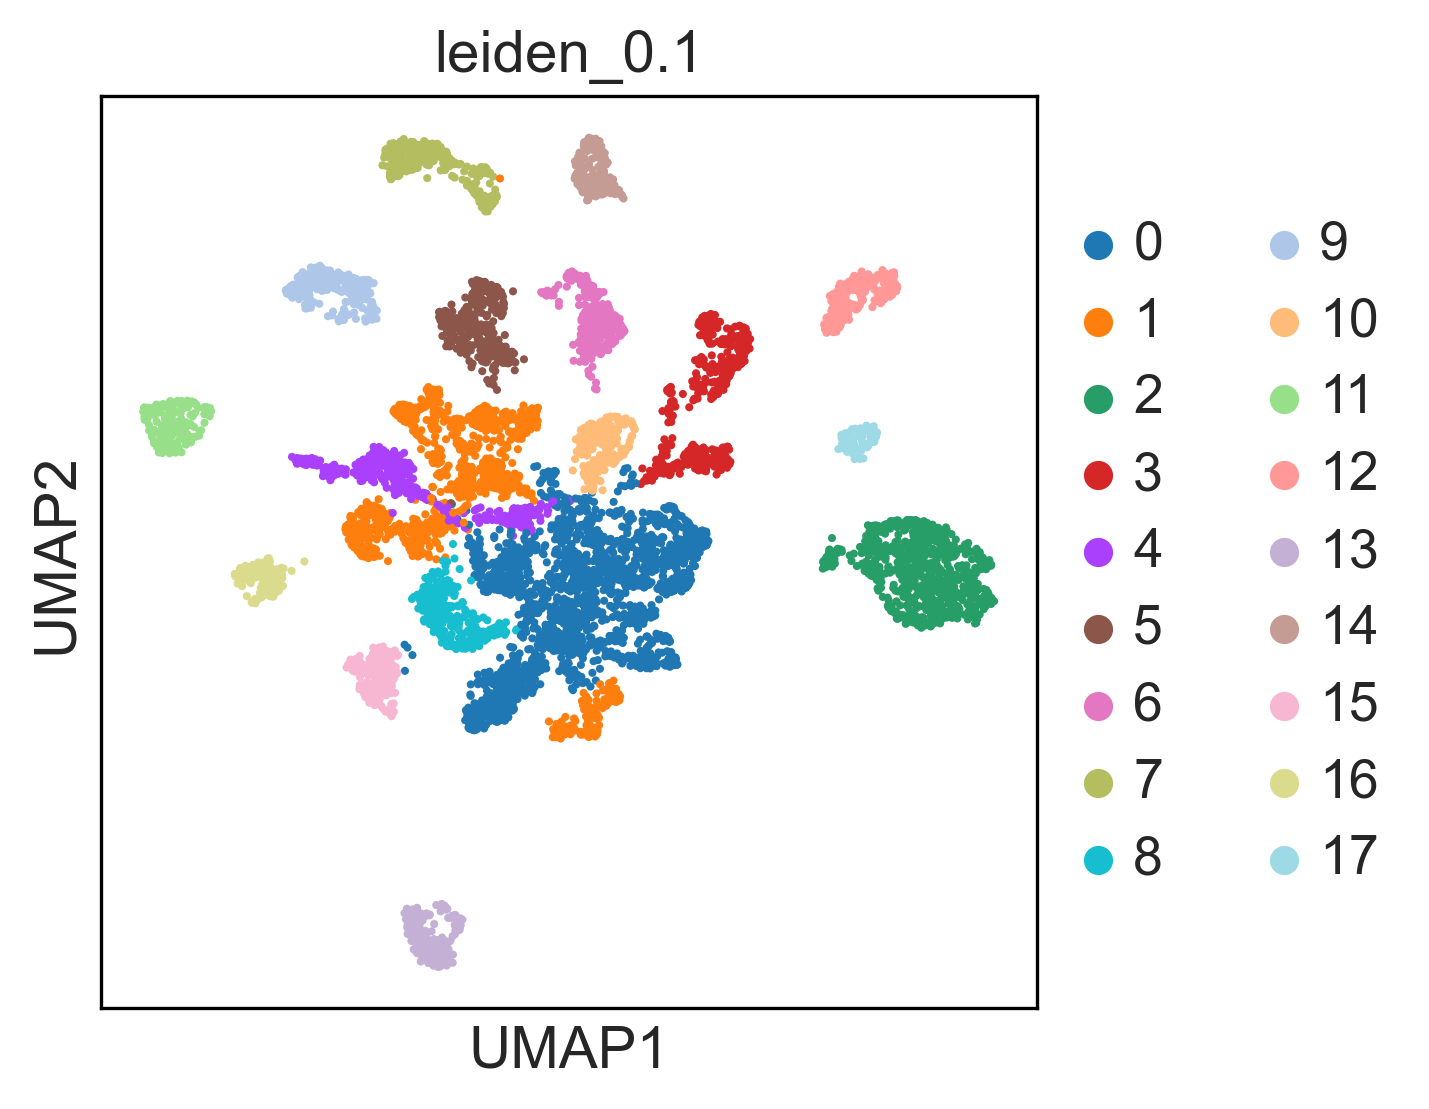

In [19]:
res=0.1
adata = sc.read('/Volumes/zjf/CHEK2/GSM3828672.final.h5ad')
sc.tl.leiden(adata, resolution=res, key_added=f'leiden_{res}')
sc.pl.umap(adata, color=f'leiden_{res}')

In [ ]:
#adata = sc.read('/Volumes/zjf/CHEK2/GSM3828672.final.h5ad')

AUC = pd.read_csv('/Volumes/zjf/CHEK2/GSM3828672.cells_AUC.Geneset.csv',index_col=0).T

for p in list(AUC.columns):
    adata.obs[p] = AUC[p]
    
#adata = adata[adata.obs['LABELS']=='T-cell',]
adata = adata[adata.obs[f'leiden_{res}']=='17',]

#adata = adata[adata.X[:,list(adata.var_names).index('CHEK2')] > 0,]
for pathway in ['IFNG','REACTOME_INTERFERON_GAMMA_SIGNALING','HALLMARK_INTERFERON_ALPHA_RESPONSE','HALLMARK_INTERFERON_GAMMA_RESPONSE','WP_TNF_ALPHA_SIGNALING_PATHWAY','GOBP_POSITIVE_REGULATION_OF_T_CELL_MEDIATED_CYTOTOXICITY','GOBP_POSITIVE_REGULATION_OF_T_CELL_PROLIFERATION']:
    sc.pl.umap(
        adata,
        color=[pathway],
        save=f'.GSM3828672.T-cell.{pathway}.AUC.pdf',
        legend_loc='on data',
        #vmin=0,
        #vmax=0.2,
        #ncols=2,
    )

In [9]:
adata = sc.read('/Volumes/zjf/CHEK2/GSM3828672.final.h5ad')

adata.obsm['X_tsne'] = SS2.loc[:,['X','Y']]

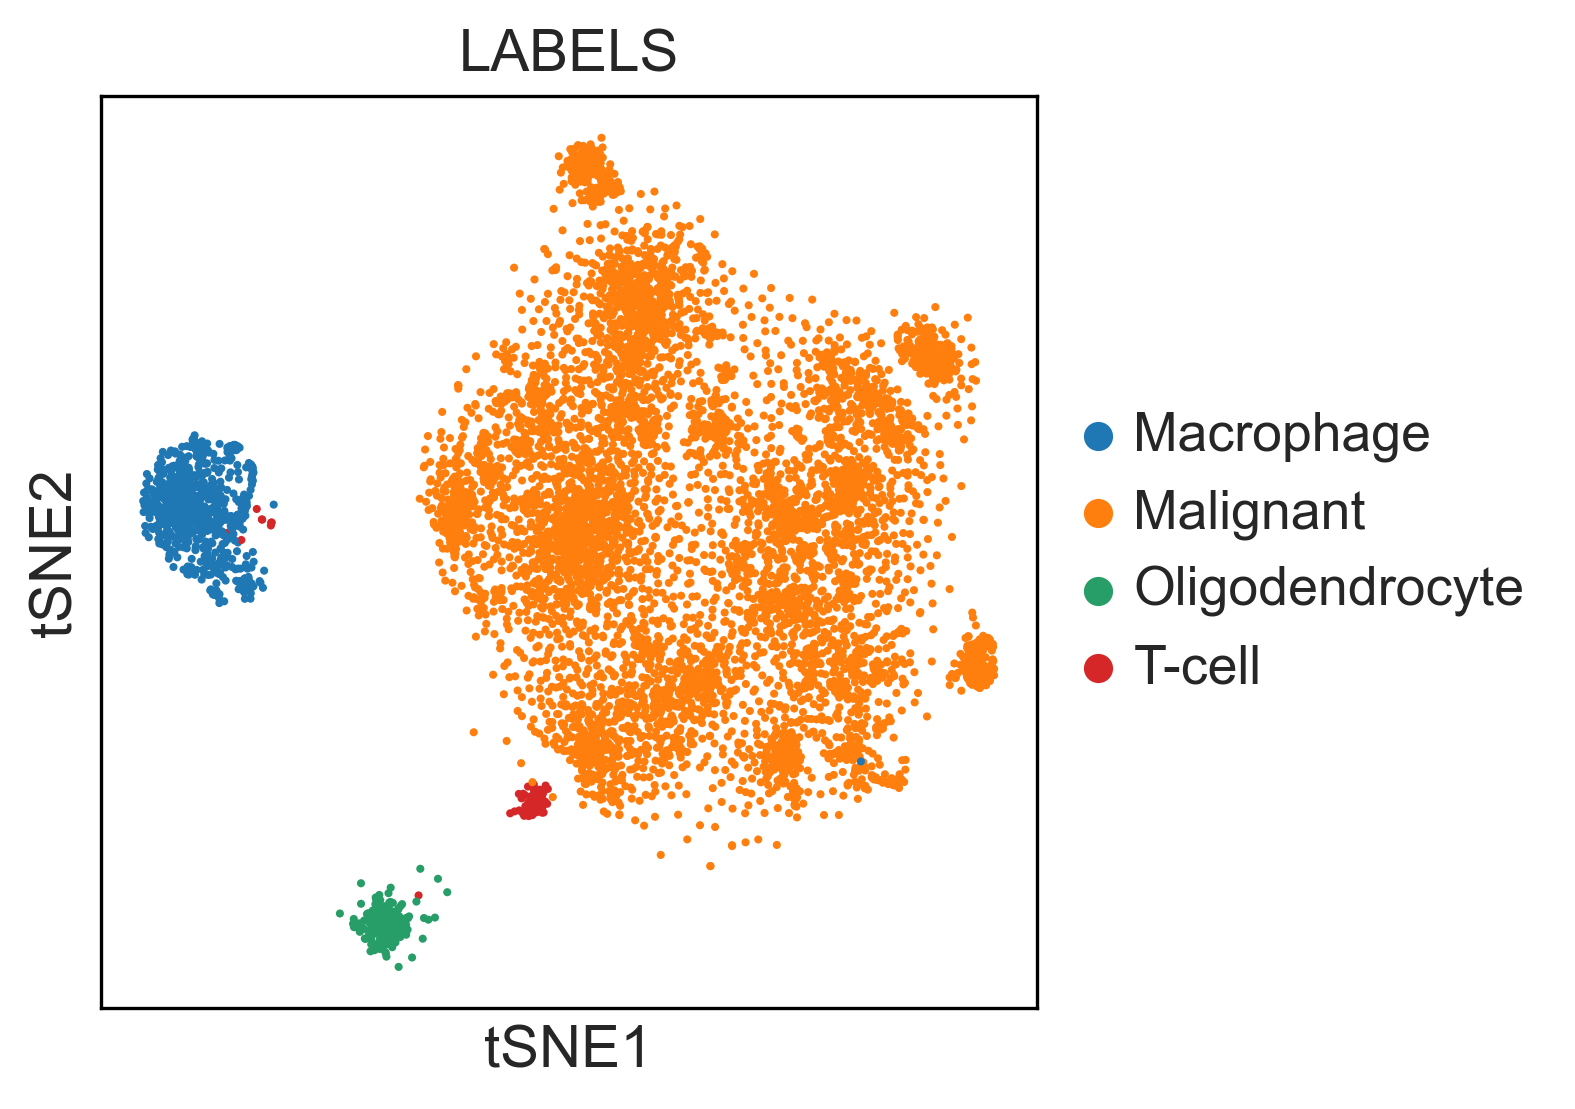

In [10]:
sc.pl.tsne(adata, color='LABELS')


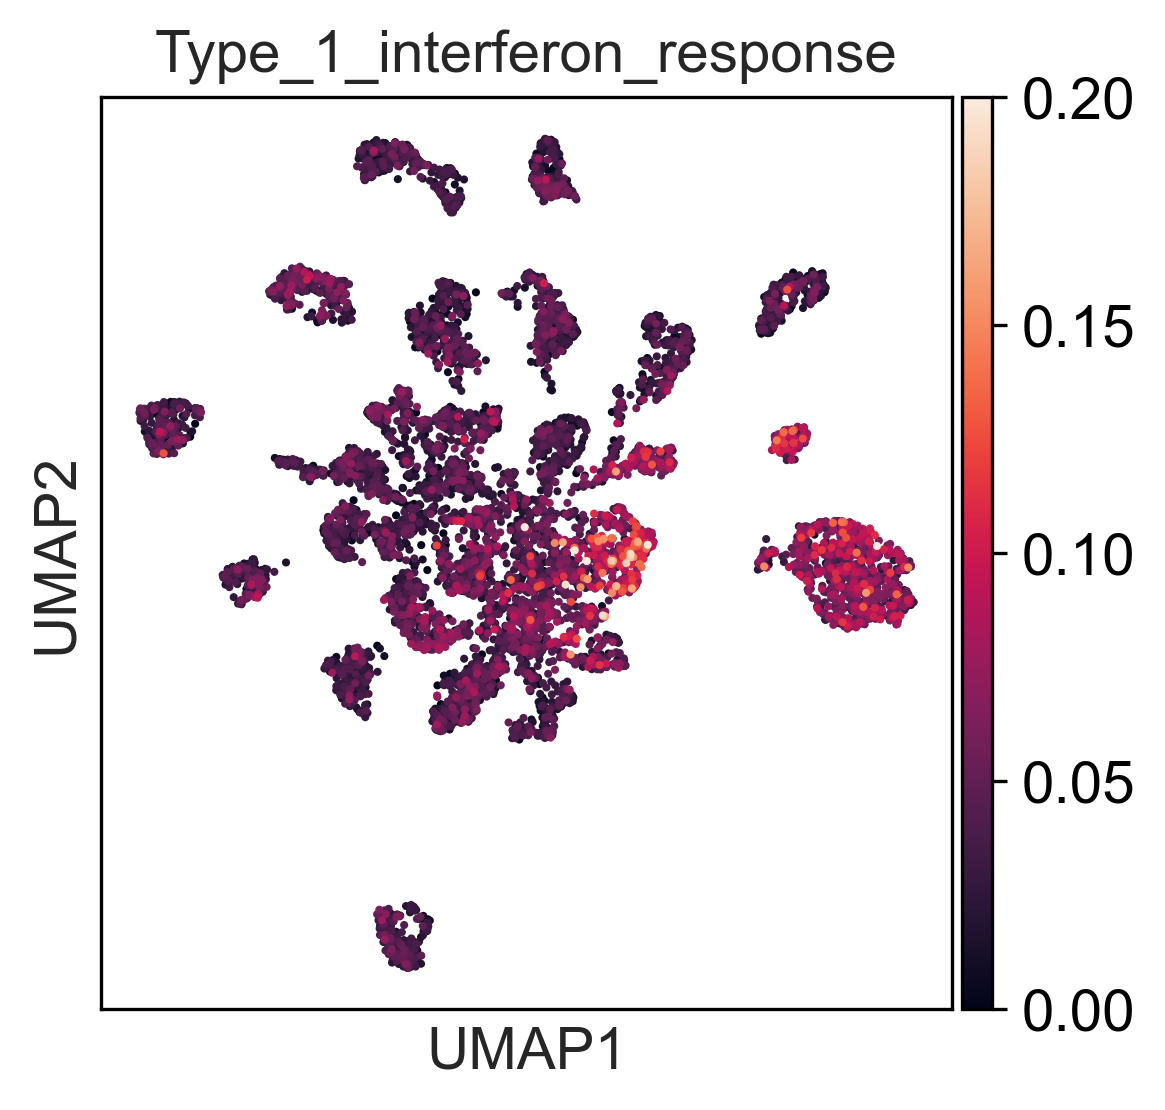

In [6]:
adata = sc.read('/Volumes/zjf/CHEK2/GSM3828672.final.h5ad')

AUC = pd.read_csv('/Volumes/zjf/CHEK2/GSM3828672.cells_AUC.Geneset.csv',index_col=0).T

for p in list(AUC.columns):
    adata.obs[p] = AUC[p]
    
#adata = adata[adata.obs['LABELS']=='T-cell',]

#adata = adata[adata.X[:,list(adata.var_names).index('CHEK2')] > 0,]

sc.pl.umap(
    adata,
    color=['Type_1_interferon_response'],
    save=f'.GSM3828672.Type_1_interferon_response.pdf',
    legend_loc='on data',
    vmin=0,
    vmax=0.2,
    #ncols=2,
)

Trying to set attribute `.obs` of view, copying.
/Users/junfeizhao/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'CHEK2 Group' as categorical


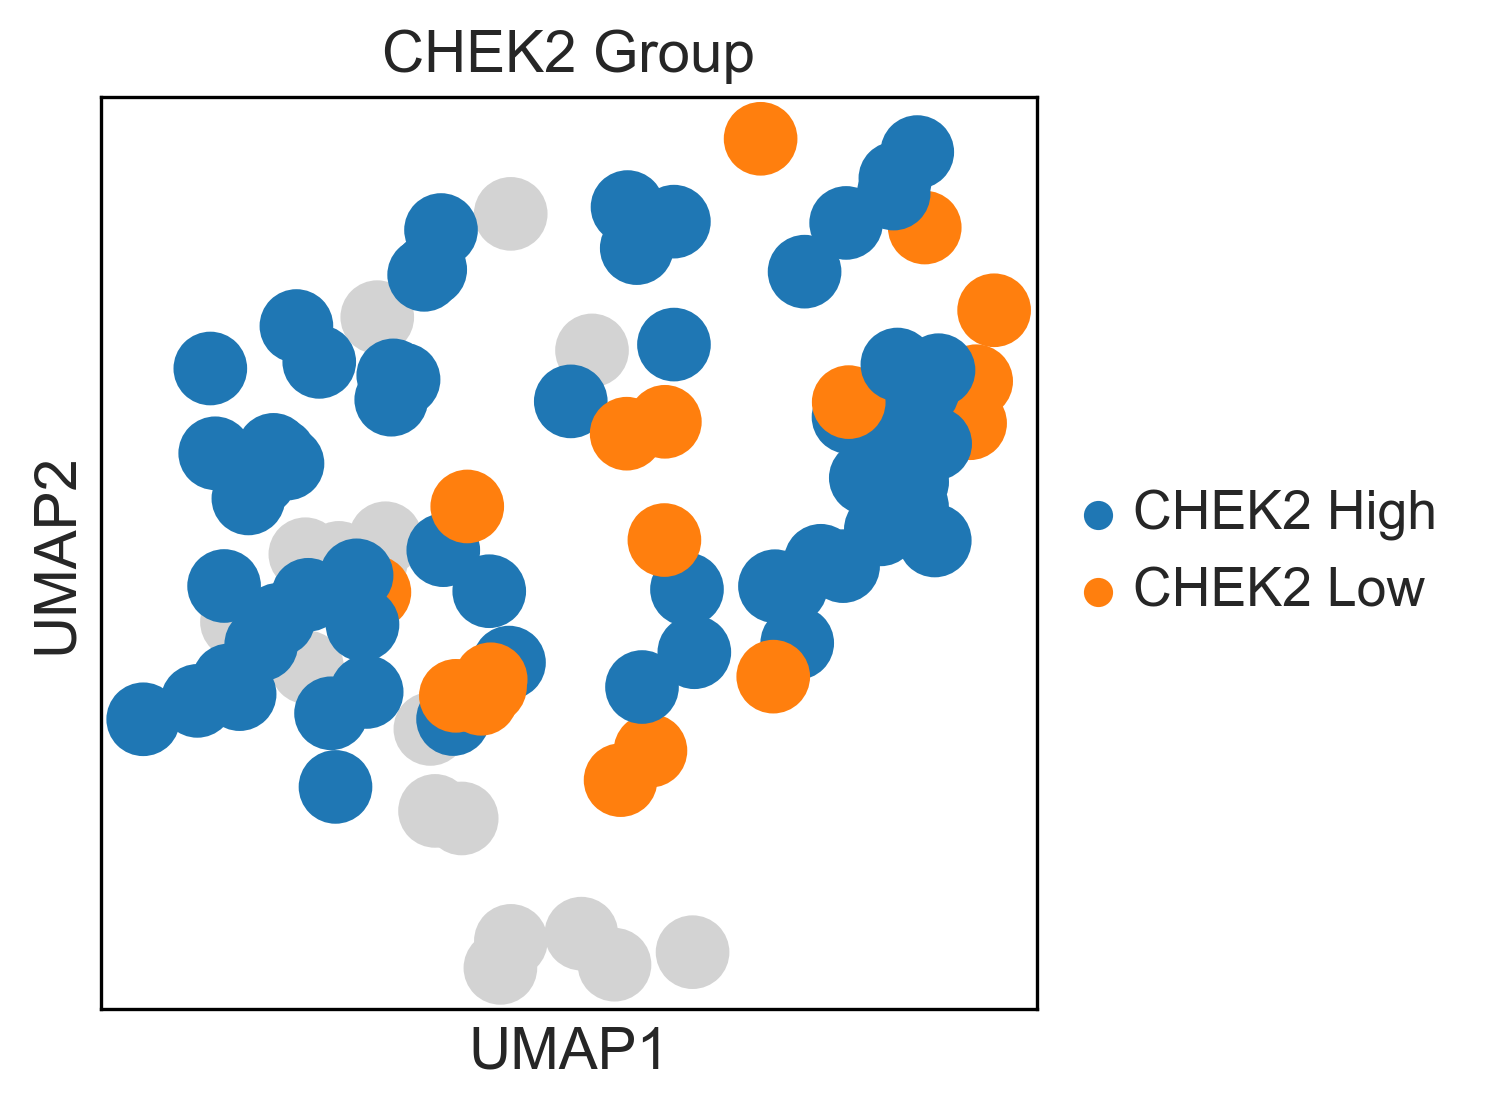

In [22]:
#adata = sc.read('/Volumes/zjf/CHEK2/GSM3828672.final.h5ad')
  
adata = adata[adata.obs[f'leiden_{res}']=='17',]

AUC = pd.read_csv('Tcells_group.csv',index_col=0)

for p in list(AUC.columns):
    adata.obs[p] = AUC[p]
  
sc.pl.umap(
    adata,
    color=['CHEK2 Group'],
    save=f'.GSM3828672.T-cell.CHEK2_Group.pdf',
    na_in_legend = False,
    #ncols=2,
)

In [16]:
AUC

,CHEK2 Group
MGH105B-C04,CHEK2 Low
MGH105B-E09,CHEK2 Low
MGH105B-E10,CHEK2 Low
MGH105B-F11,CHEK2 Low
MGH105B-G07,CHEK2 Low
...,...
BT1187-P3-E06,NaN
BT1187-P4-C11,NaN
BT1187-P4-D11,NaN
BT1187-P4-G08,NaN


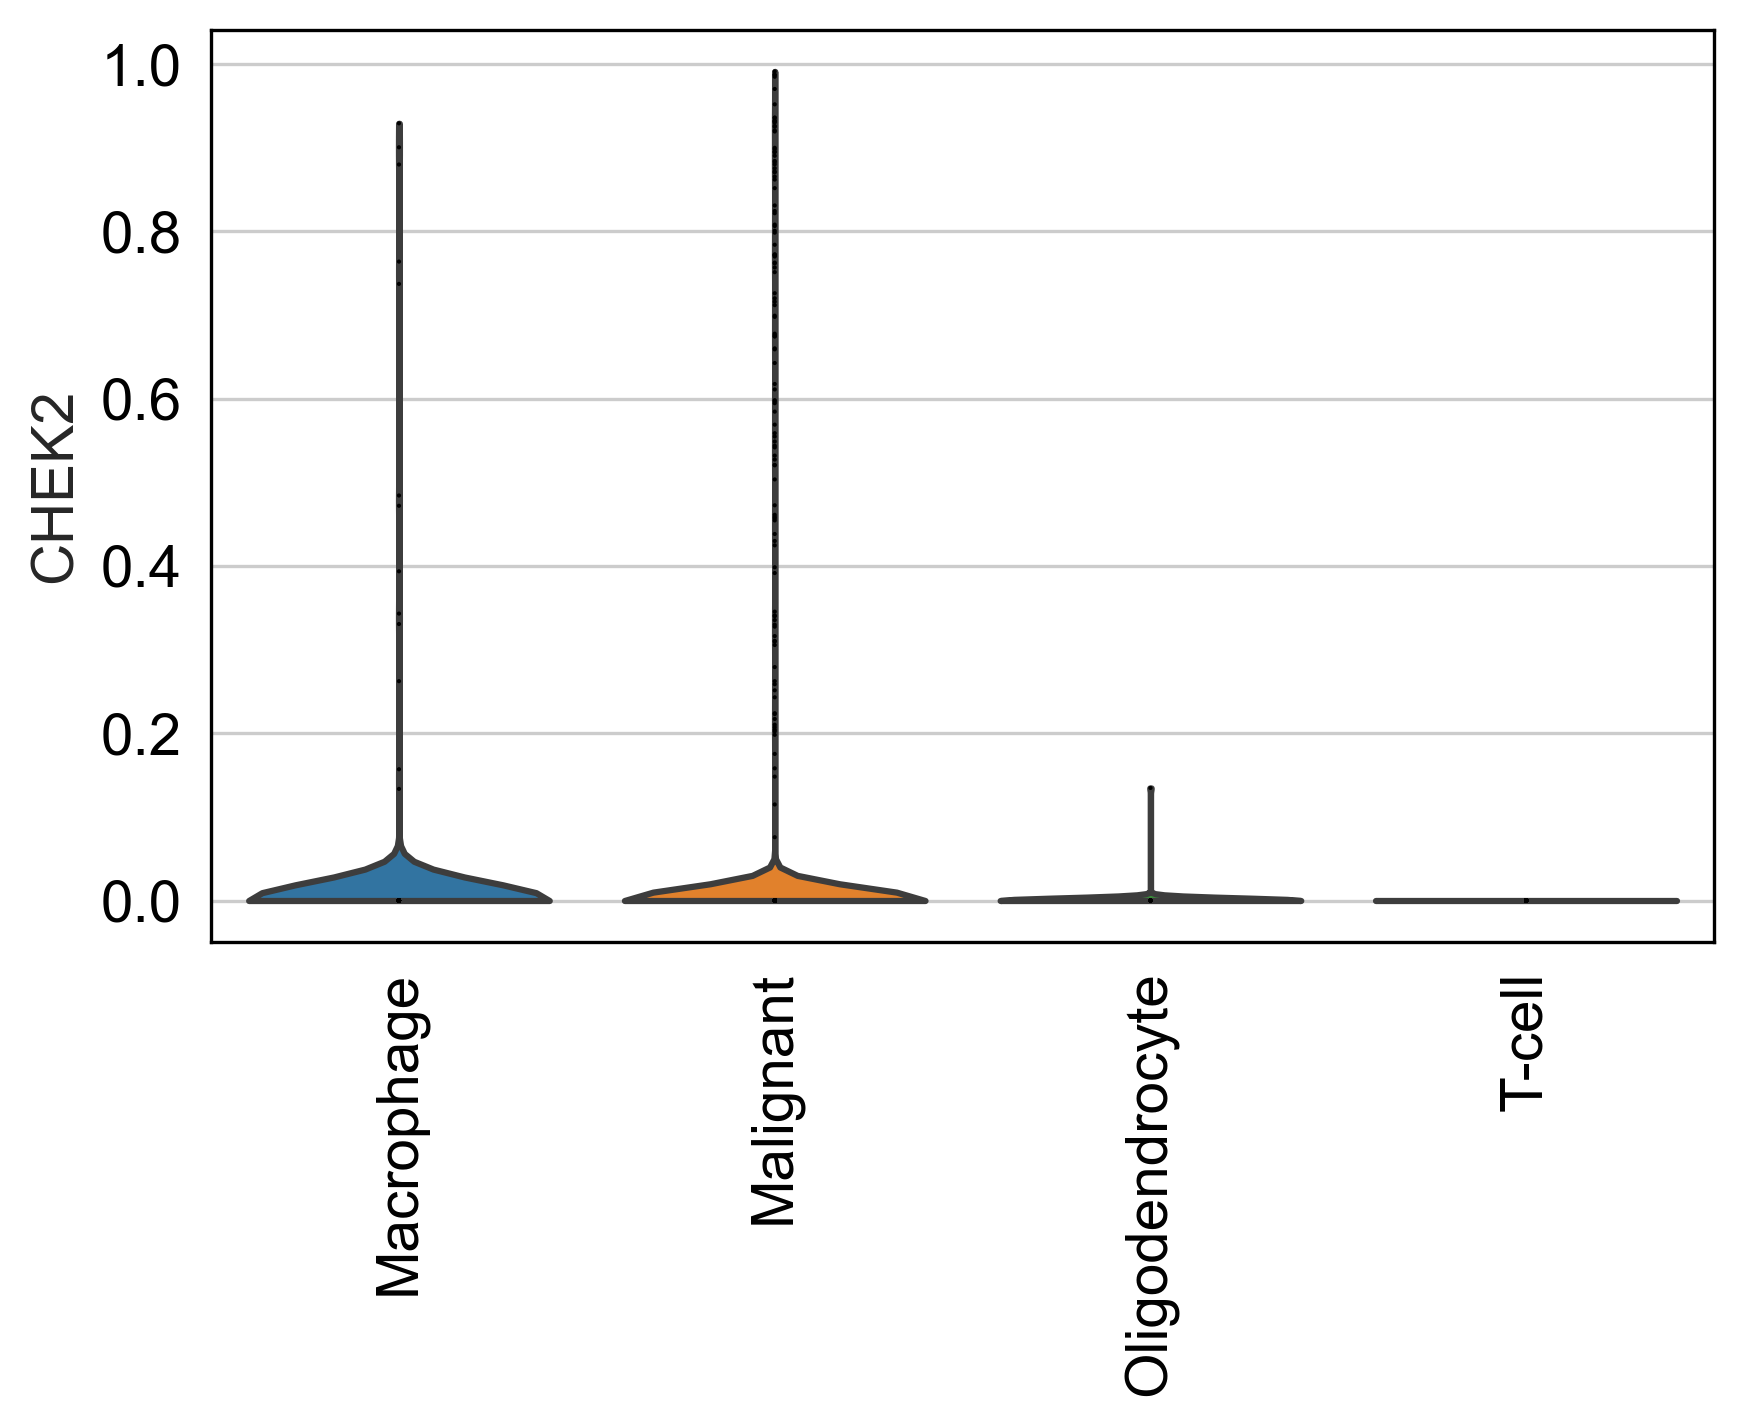

In [26]:
with plt.rc_context({"figure.figsize": (6, 4), "figure.dpi": (300)}):
    sc.pl.violin(
        adata_gc,
        [
            'CHEK2',
        ],
        save=f'.GSM3828672.CHEK2.pdf',
        jitter=False,
        palette=['#1f77b4','#ff7f0e','#2ca02c','#9467bd'],
        groupby='LABELS',
        rotation=90,
        cut=0,
    )

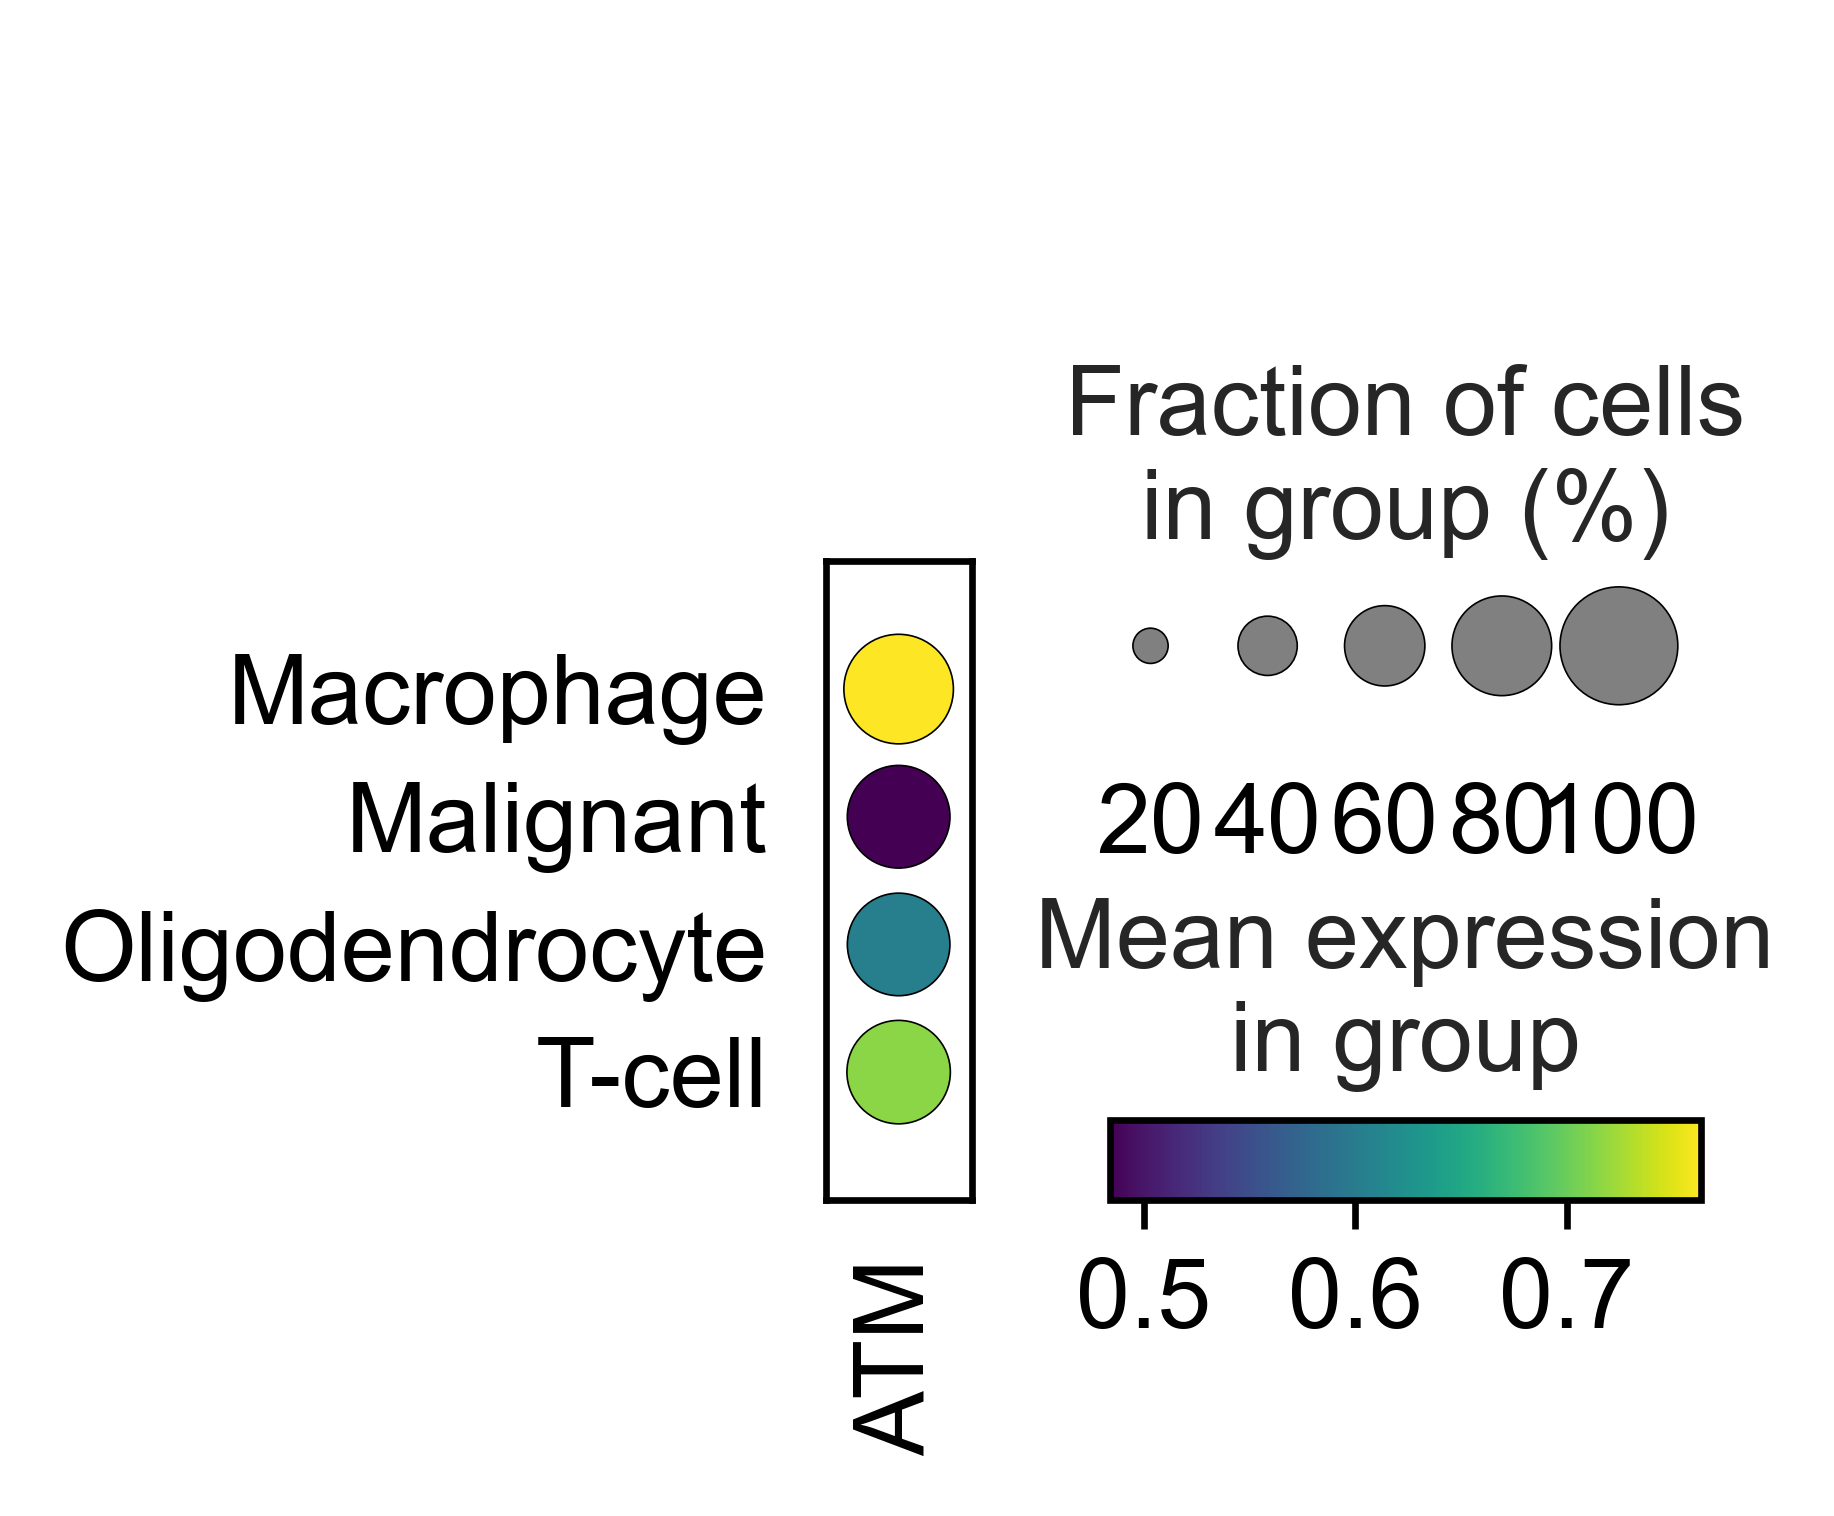

In [7]:
sc.pl.dotplot(
    adata,
    [
        'ATM',
    ],
    color_map='viridis',
    groupby='LABELS',
    #use_raw=True,
    mean_only_expressed=True,
    # dot_max=0.7,
    save=f'.GSM3828672.ATM.pdf',
)

In [67]:
adata

AnnData object with n_obs × n_vars = 7930 × 23686
    obs: 'LABELS'
    uns: 'log1p', 'neighbors', 'umap', 'LABELS_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [41]:
adata.to_df().to_csv('/Volumes/zjf/CHEK2/GSM3828672.X.csv')

In [38]:
adata_tumor = adata[adata.obs['LABELS']=='Malignant',]

In [40]:
adata_tumor.to_df().to_csv('/Volumes/zjf/CHEK2/GSM3828672.Malignant.X.csv')

In [57]:
CHEK2_cells = list(adata.obs.index[adata.X[:,list(adata.var.index).index('CHEK2')]>0])

In [62]:
import csv

with open('CHEK2_cells.csv', 'w+') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(CHEK2_cells)

In [63]:
len(CHEK2_cells)

696

In [85]:
adata.write('/Volumes/zjf/CHEK2/GSM3828672.final.h5ad')

... storing 'Patient' as categorical


# Patient analysis

In [10]:
adata = sc.read('/Volumes/zjf/CHEK2/GSM3828672.final.h5ad')


In [5]:
adata

AnnData object with n_obs × n_vars = 7930 × 23686
    obs: 'LABELS', 'Patient'
    uns: 'LABELS_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [7]:
adata = adata[adata.obs['LABELS']=='Malignant',]

In [8]:
adata

View of AnnData object with n_obs × n_vars = 6863 × 23686
    obs: 'LABELS', 'Patient'
    uns: 'LABELS_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [14]:
adata = sc.read('/Volumes/zjf/CHEK2/GSM3828672.final.h5ad')
adata = adata[adata.obs['LABELS']=='T-cell',]

In [15]:
set(adata.obs['Patient'])

{'BT1187', 'MGH105', 'MGH106', 'MGH110', 'MGH113', 'MGH122', 'MGH125'}

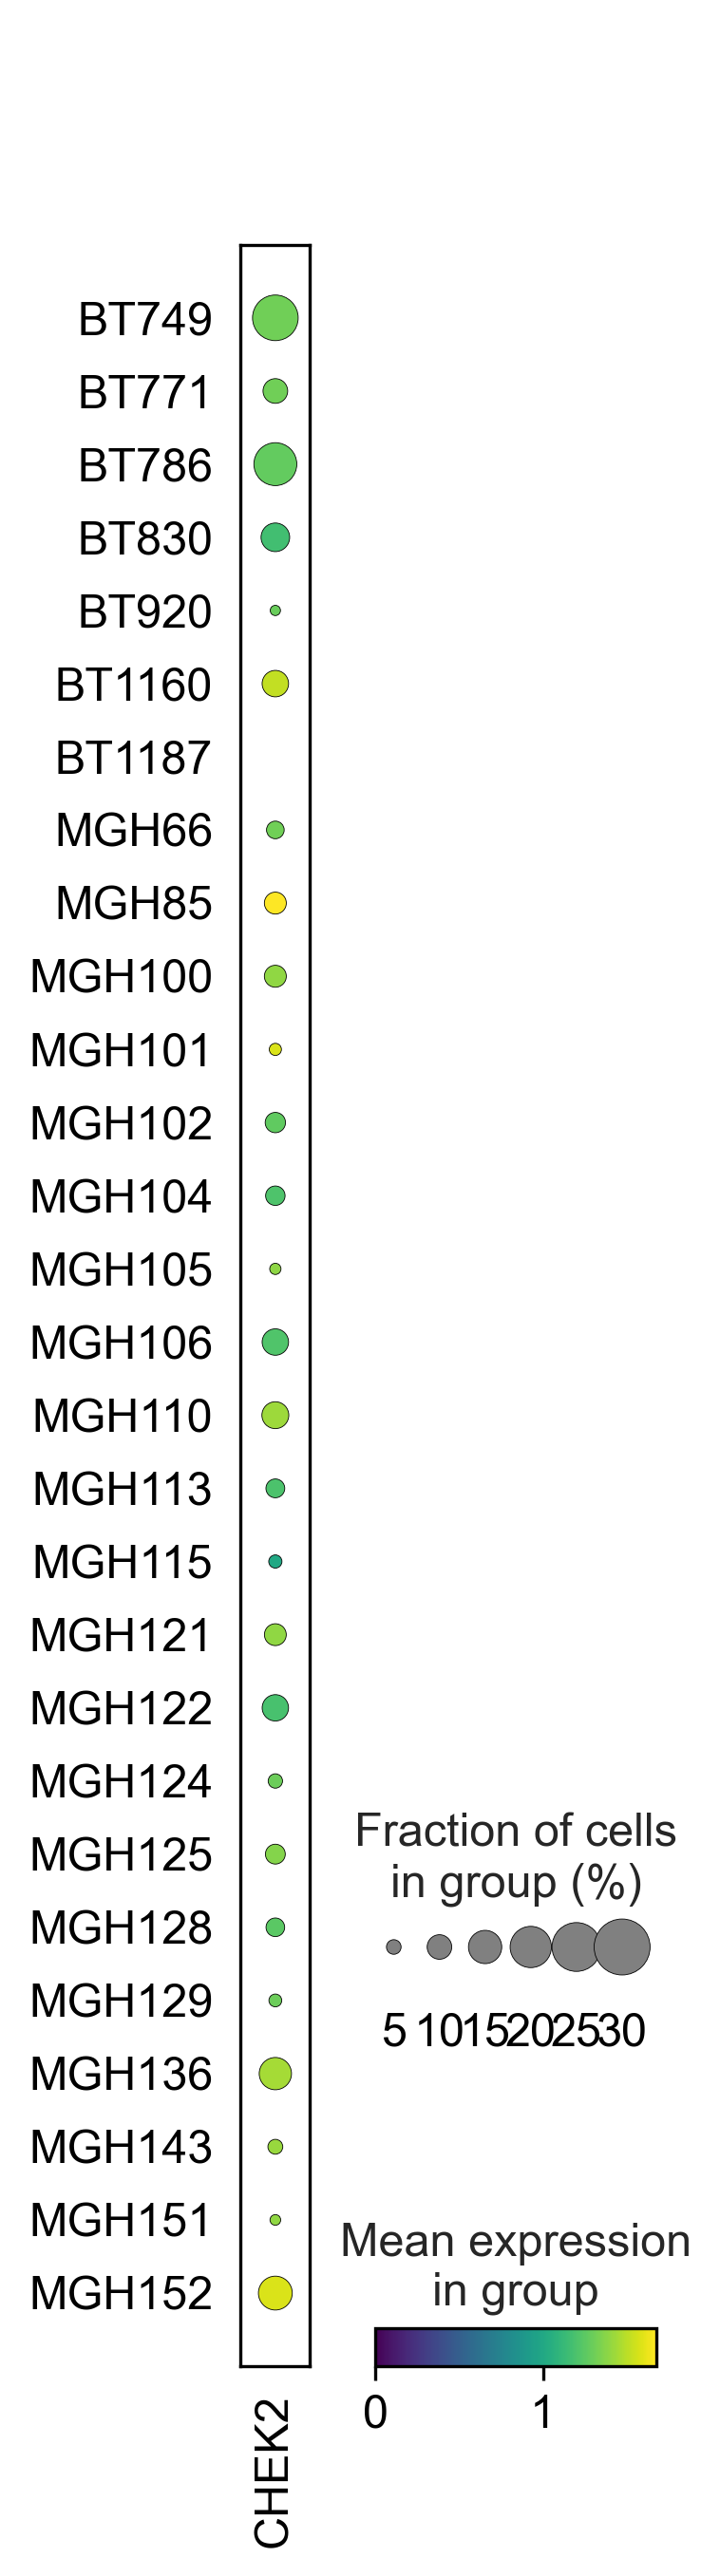

In [13]:
adata = sc.read('/Volumes/zjf/CHEK2/GSM3828672.final.h5ad')
adata = adata[adata.obs['LABELS']=='Malignant',]
sc.pl.dotplot(
    adata,
    [
        'CHEK2',
    ],
    color_map='viridis',
    groupby='Patient',
    #use_raw=True,
    mean_only_expressed=True,
    # dot_max=0.7,
    save=f'.GSM3828672.CHEK2.patient.Malignant.pdf',)

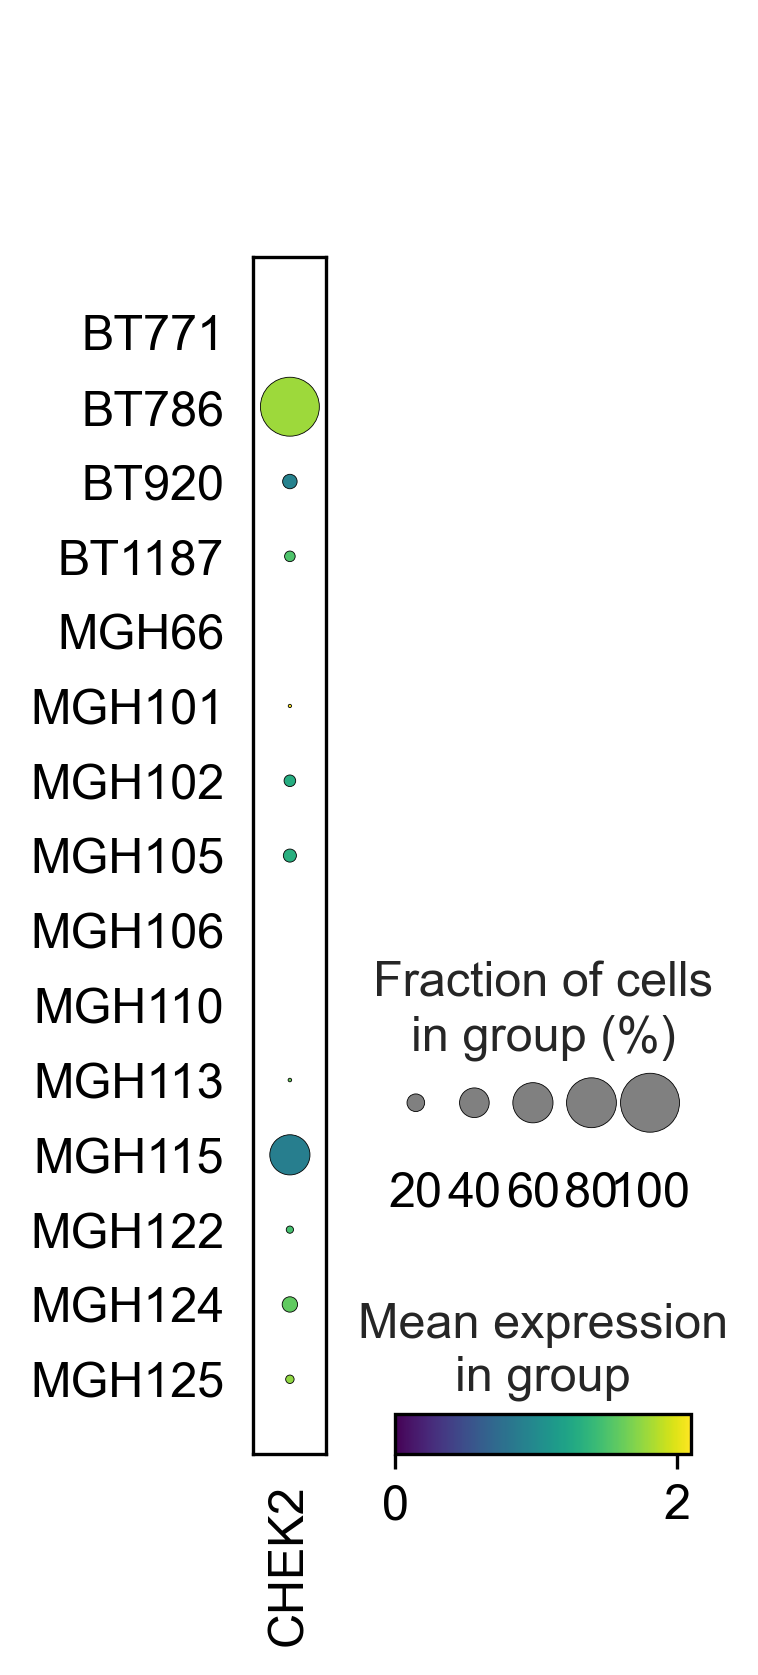

In [12]:
adata = sc.read('/Volumes/zjf/CHEK2/GSM3828672.final.h5ad')
adata = adata[adata.obs['LABELS']=='Macrophage',]
sc.pl.dotplot(
    adata,
    [
        'CHEK2',
    ],
    color_map='viridis',
    groupby='Patient',
    #use_raw=True,
    mean_only_expressed=True,
    # dot_max=0.7,
    save=f'.GSM3828672.CHEK2.patient.Macrophage.pdf',)

In [21]:
adata = sc.read('/Volumes/zjf/CHEK2/GSM3828672.final.h5ad')

In [22]:
set(adata.obs['LABELS'])

{'Macrophage', 'Malignant', 'Oligodendrocyte', 'T-cell'}

In [23]:
adata

AnnData object with n_obs × n_vars = 7930 × 23686
    obs: 'LABELS', 'Patient'
    uns: 'LABELS_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [27]:
IDs = set(adata[adata.obs['LABELS']=='Malignant',].obs['Patient']) & set(adata[adata.obs['LABELS']=='T-cell',].obs['Patient'])

In [36]:
IDs_out = open('IDs_with_Malignant_Tcell_CHEK2.txt','w+')
for ID in IDs:
    IDs_out.write(ID + '\n')
IDs_out.close()

In [29]:
adata = adata[[p in IDs for p in adata.obs['Patient']],]

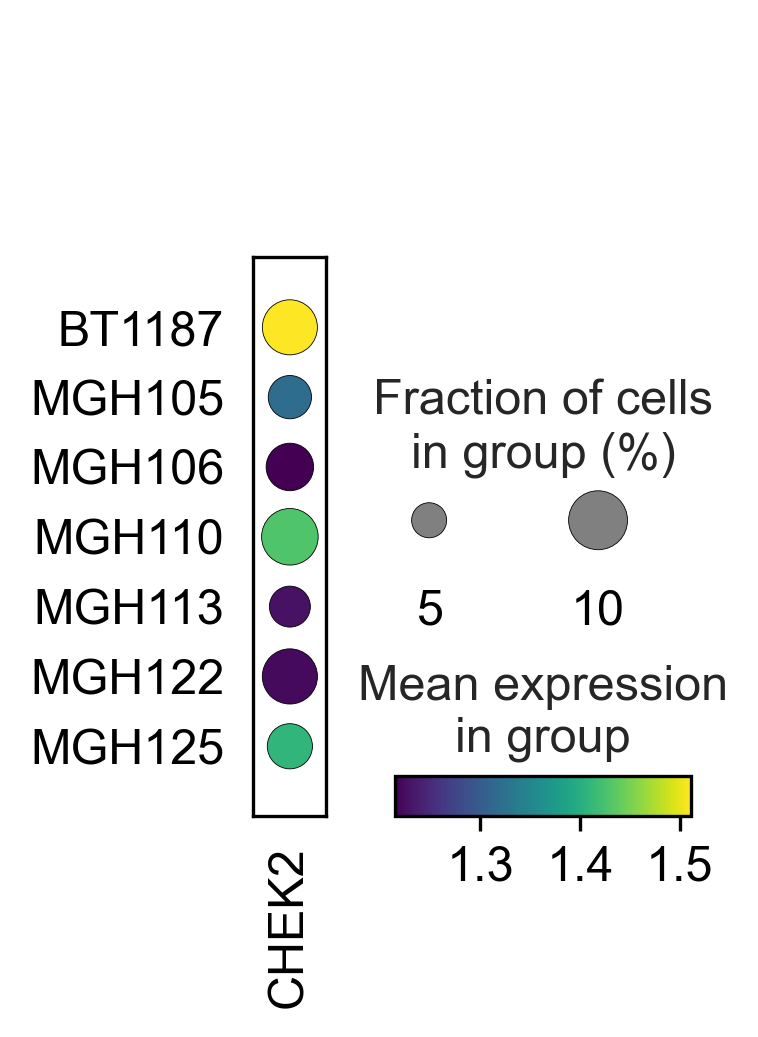

In [33]:
sc.pl.dotplot(
    adata,
    [
        'CHEK2',
    ],
    color_map='viridis',
    groupby='Patient',
    #use_raw=True,
    mean_only_expressed=True)

Trying to set attribute `.uns` of view, copying.


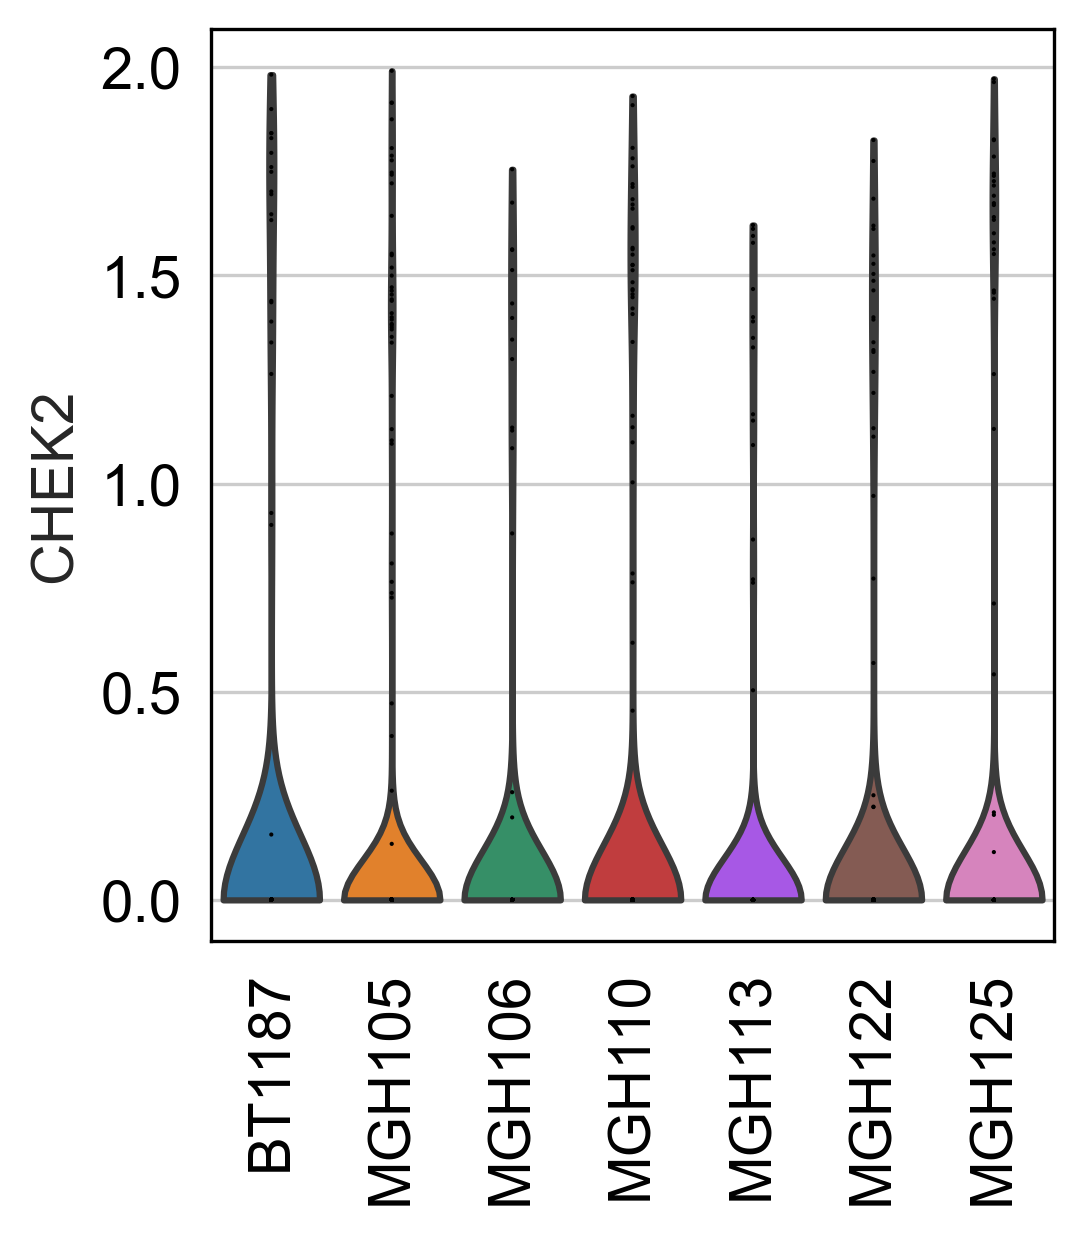

In [34]:
sc.pl.violin(
    adata,
    [
        'CHEK2',
    ],
    jitter=False,
    groupby='Patient',
    rotation=90,
    cut=0,
)